### Ptoyecto final 
Luis Adolfo Martínez Ortiz 
Carnet: 22000352

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings 

(array([ 16.,  35.,  98., 229., 359., 327., 217., 129.,  41.,   9.]),
 array([-3.09141395, -2.47528488, -1.85915581, -1.24302674, -0.62689767,
        -0.0107686 ,  0.60536047,  1.22148954,  1.83761861,  2.45374768,
         3.06987675]),
 <BarContainer object of 10 artists>)

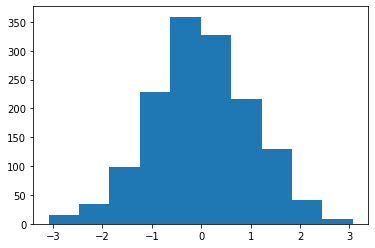

In [2]:
data = np.load('proyecto_training_data.npy')
#distribucion normal de la longitud del dataset para luego dividrlo y tomar el 80% para entrenamiento
distri = np.random.randn(len(data))

plt.hist(distri)

In [3]:
#obtenemos para el 80% para entrenar

check = (distri<0.80)
training = np.nan_to_num(data[check])   #80% de la data
testing   = np.nan_to_num(data[~check])  #80% de la data


In [4]:
len(training),len(testing)

(1153, 307)

In [5]:
columna = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]
#el de entramiento
dt = pd.DataFrame(training,columns=columna)
# el del test con 20%
dtTestin = pd.DataFrame(testing,columns=columna)

In [6]:
def calcula_estadisitica(arr,columna):
    print("  Media:", np.mean(arr[columna]))
    print("  Maximo: ", np.max(arr[columna]))
    print("  Minimo: ", np.min(arr[columna]))
    print("  Rango: ", np.ptp(arr[columna],axis=0))
    print("  Std   : ", np.std(arr[columna]))

In [7]:
def grafica_distplot(filas,columnas,dato):
    fila = 0
    columna = 0
    a, axes = plt.subplots(filas, columnas, figsize=(17, 10))
    for i in dato.columns:
        if columna == (columnas):
            fila += 1
            columna = 0
        sns.distplot(dato[i],ax=axes[fila,columna])
        columna += 1

In [8]:
def grafica_correlacion(filas, columnas,dato,correla):
    fila = 0
    columna = 0
    fig, axs = plt.subplots(filas, columnas, figsize=(17, 10))
    for i in dato.columns:
        if columna == (columnas):
            fila += 1
            columna = 0
        axs[fila,columna].scatter(dato[i],dato['SalePrice'])
        axs[fila,columna].set_title(i +' coeficiente: '+ str(round(correla[i][0],4)))
        columna += 1

In [9]:
for i in dt.columns:
    print("Datos estadisitos de: ",i)
    print(calcula_estadisitica(dt,i))

Datos estadisitos de:  SalePrice
  Media: 183168.90459670426
  Maximo:  755000.0
  Minimo:  34900.0
  Rango:  720100.0
  Std   :  82245.00264980768
None
Datos estadisitos de:  OverallQual
  Media: 6.136166522116219
  Maximo:  10.0
  Minimo:  1.0
  Rango:  9.0
  Std   :  1.4104128482300915
None
Datos estadisitos de:  1stFlrSF
  Media: 1167.6747614917606
  Maximo:  4692.0
  Minimo:  334.0
  Rango:  4358.0
  Std   :  392.2805240783316
None
Datos estadisitos de:  TotRmsAbvGrd
  Media: 6.549002601908066
  Maximo:  12.0
  Minimo:  2.0
  Rango:  10.0
  Std   :  1.6278904117090978
None
Datos estadisitos de:  YearBuilt
  Media: 1972.0962705984389
  Maximo:  2010.0
  Minimo:  1872.0
  Rango:  138.0
  Std   :  30.101768899214694
None
Datos estadisitos de:  LotFrontage
  Media: 58.15351257588898
  Maximo:  313.0
  Minimo:  0.0
  Rango:  313.0
  Std   :  35.040774517914436
None


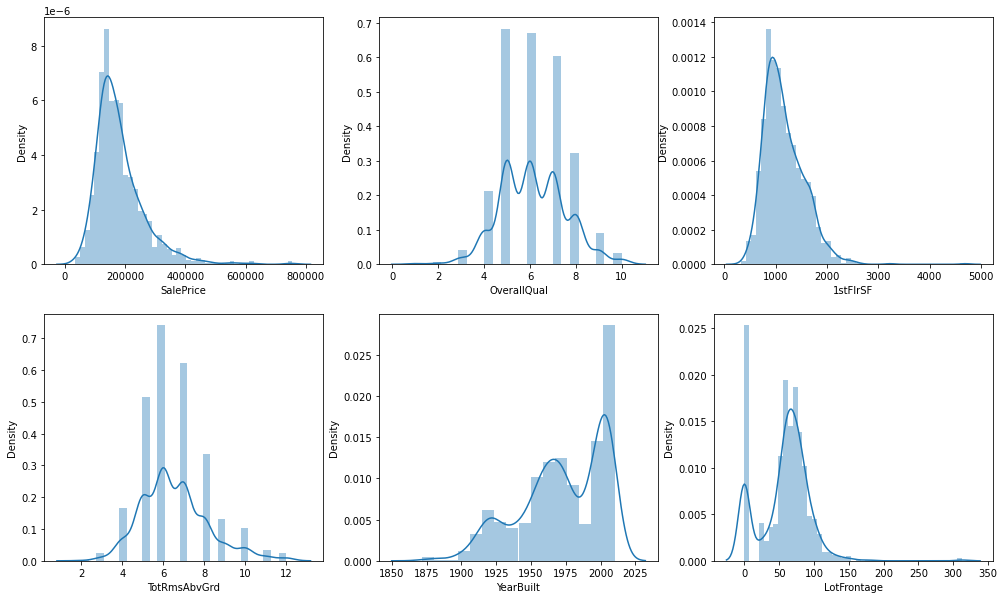

In [10]:
warnings.filterwarnings('ignore')  #para omitir el aviso que me da que
# pronto la función de distplot pueda ser que no este dispobible en otra version del seaborn
# gráficamos histrograma 
grafica_distplot(2,3,dt)

In [11]:
# matriz de correlacion entre las variables.
correlacion = dt.corr()

In [12]:
correlacion

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793477,0.621852,0.538952,0.522271,0.223651
OverallQual,0.793477,1.000000,0.491251,0.429801,0.591397,0.187175
1stFlrSF,0.621852,0.491251,1.000000,0.404876,0.296053,0.288531
TotRmsAbvGrd,0.538952,0.429801,0.404876,1.000000,0.098143,0.231729
YearBuilt,0.522271,0.591397,0.296053,0.098143,1.000000,0.044207
LotFrontage,0.223651,0.187175,0.288531,0.231729,0.044207,1.000000


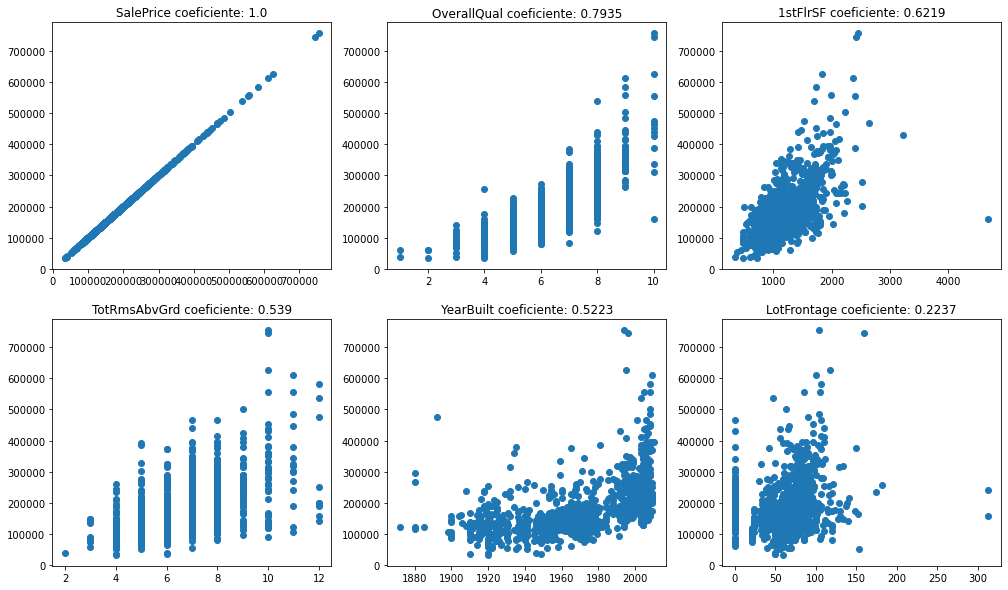

In [13]:
#Gráfiamos correlación
grafica_correlacion(2,3,dt,correlacion)

### observamos las que tienen más correlación con SaelePrice es:
### OverallQual : 0.7949  y 1stFlrSF: 0.6009

In [14]:
def calculo_error(y_pred, y_actual):
   return np.average((np.power(y_pred-y_actual,2)/2))

In [15]:
def entrenar_modelo(x,y,epochs,error_cada,lr=0.00001):
    #creamos matriz con x y con la otra columna de uno
    array_x  = np.column_stack((x,np.ones_like(y)))
    mb= np.array([0,0])   #cambiar a otro valor inicial      
    modelo = {}
    error = [] #np.zeros(epochs)
    contador = 1
    for i in range(epochs):
        modelo[i] = mb
        #product punto operación vectorizada
        yhat = np.matmul(array_x,mb)
        #error 
        #error[i]  = np.average((np.power(yhat-y,2)/2))
        #error.append(np.average((np.power(yhat-y,2)/2)))
        error.append(calculo_error(yhat, y))
        #Mostrams el error en cada iteración
        if contador == error_cada:
            print(i+1,": Error: ", error[i])
            contador = 0
        contador+=1
        diferencia = yhat - y 
        gradiantes = np.matmul(diferencia,array_x) / diferencia.shape[0]
        #print(array_x)
        mb = [mb[0]-lr*gradiantes[0], mb[1]-lr*gradiantes[1]]
    return modelo,error

In [16]:
def grafica_error(modelo,error):
    xx = np.linspace(1,len(error),len(error))
    yy = error    
    plt.plot(xx,yy,linestyle = 'dashed')
    plt.xlabel('Iteracion')
    plt.ylabel('Error')
    plt.title('Grafica de error')
    plt.show()


In [17]:
def grafica_modelo_train(modelo,x,y,n):
    #iteraciones = n/3
    
    for i in range(len(modelo)):
        if i % n == 0:   
            #print('here: ',i)
            y_predict= modelo[i][0]*x + modelo[i][1]    
            y_predict = y_predict.tolist()
            x_list = x.tolist() 
            y_actual = y.tolist()
            datos = pd.DataFrame(
                    {
                        "x":x_list,
                        "y_actual":y_actual,
                        "y_prediccion":y_predict
                    }
                )
            %matplotlib inline
            plt.plot(datos["x"], datos["y_actual"], "ro")
            plt.plot(datos["x"], datos["y_prediccion"])
            plt.title("Valor Actual vs Predicción en el tiempo "+str(i))
            plt.show()
    return datos

### modelo para OverallQual

10 : Error:  1525537643.0443065
20 : Error:  1511384985.8719406
30 : Error:  1501430575.4427745
40 : Error:  1491859527.9447763
50 : Error:  1482656800.54339
60 : Error:  1473808219.2513466
70 : Error:  1465300155.5581725
80 : Error:  1457119505.4157362
90 : Error:  1449253669.0555031
100 : Error:  1441690531.5824802
110 : Error:  1434418444.3159506
120 : Error:  1427426206.84828
130 : Error:  1420703049.794139
140 : Error:  1414238618.2035873
150 : Error:  1408022955.613468
160 : Error:  1402046488.7125456
170 : Error:  1396300012.5967734
180 : Error:  1390774676.591977
190 : Error:  1385461970.6221204
200 : Error:  1380353712.102159
210 : Error:  1375442033.3352911
220 : Error:  1370719369.3951972
230 : Error:  1366178446.4746034
240 : Error:  1361812270.6822255
250 : Error:  1357614117.270836
260 : Error:  1353577520.2798653
270 : Error:  1349696262.5765839
280 : Error:  1345964366.2805266
290 : Error:  1342376083.5564096
300 : Error:  1338925887.7613668
310 : Error:  1335608464.932

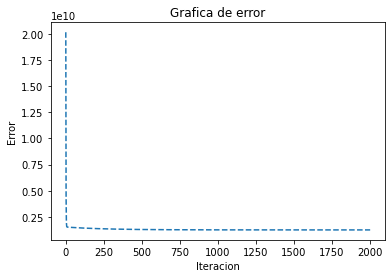

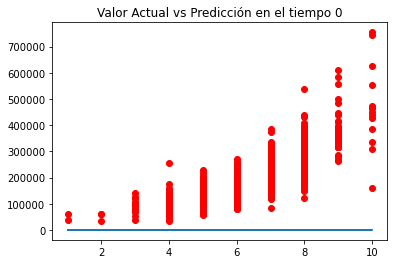

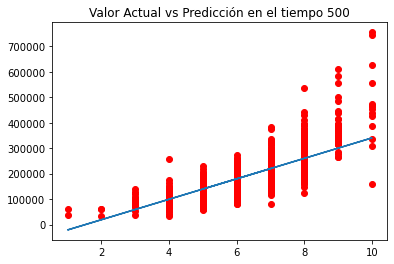

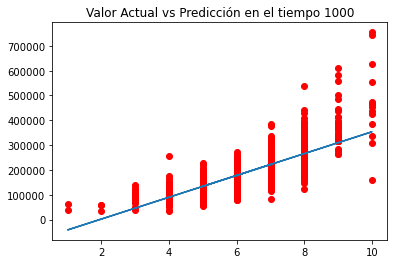

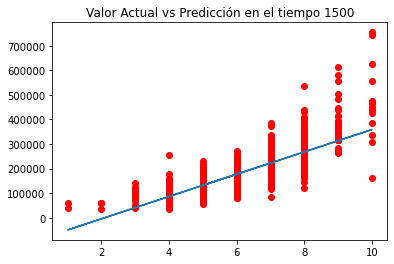

,x,y_actual,y_prediccion
0,7.0,208500.0,222666.924503
1,6.0,181500.0,177257.871038
2,7.0,223500.0,222666.924503
3,7.0,140000.0,222666.924503
4,8.0,250000.0,268075.977968


In [18]:
modelo_over,error_over = entrenar_modelo(dt['OverallQual'],dt['SalePrice'], 2000,10,0.04)
grafica_error(modelo_over,error_over)
datos = grafica_modelo_train(modelo_over, dt['OverallQual'], dt['SalePrice'], 500)
datos.head()

### modelo para 1stFlrSF

10 : Error:  2122898123.541556
20 : Error:  2122770903.7013159
30 : Error:  2122770805.0577044
40 : Error:  2122770706.6541178
50 : Error:  2122770608.2507315


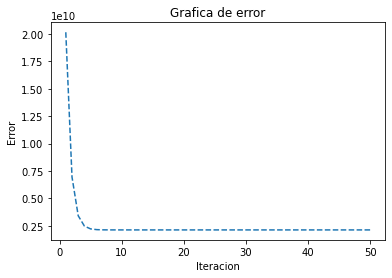

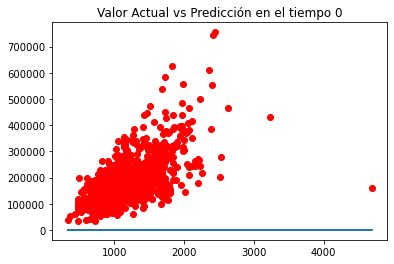

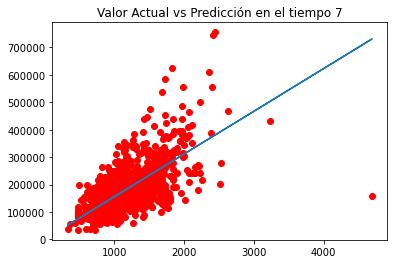

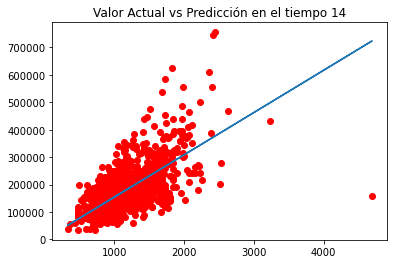

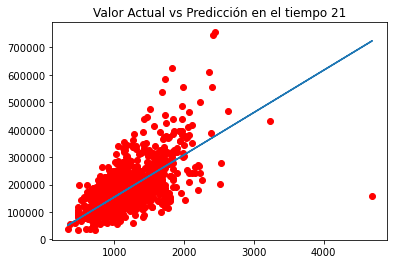

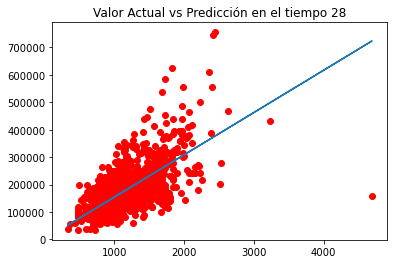

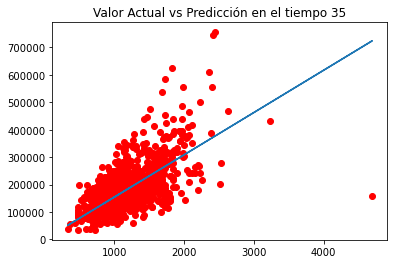

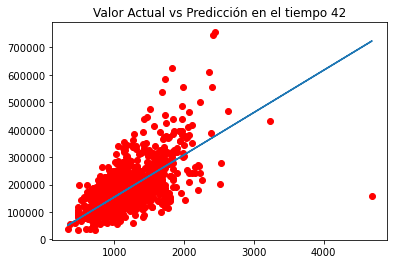

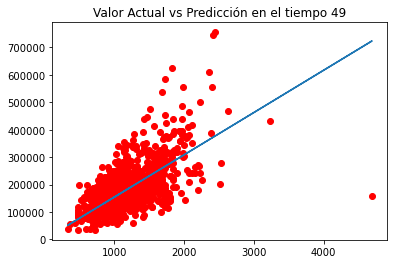

,x,y_actual,y_prediccion
0,856.0,208500.0,131978.065506
1,1262.0,181500.0,194575.009452
2,920.0,223500.0,141845.564059
3,961.0,140000.0,148166.930320
4,1145.0,250000.0,176535.988660


In [19]:
modelo_flr,error_flr = entrenar_modelo(dt['1stFlrSF'],dt['SalePrice'], 50,10,0.000001)
grafica_error(modelo_flr,error_flr)
datos_flr = grafica_modelo_train(modelo_flr, dt['1stFlrSF'], dt['SalePrice'], 7)
datos_flr.head()


### scikit-learn

In [20]:
lm1 = LinearRegression()
lm2 = LinearRegression()
OverallQual = np.array([dt['OverallQual'].tolist()])
O1stFlrSF    = np.array([dt['1stFlrSF'].tolist()])
SalePrice    = np.array(dt['SalePrice'].tolist())
modelo_OverQual_sklearn = lm1.fit(OverallQual.reshape(-1,1),SalePrice)
modelo_1stFlrSF_sklearn = lm2.fit(O1stFlrSF.reshape(-1,1),SalePrice)

In [21]:
def predicciones(modelo_normal, modelo_sklearn, x):
    y_pred_manual = modelo_normal[0]*x + modelo_normal[1]
    y_pred_sklean = modelo_sklearn.predict(x.reshape(-1,1))
    return y_pred_manual,y_pred_sklean,(y_pred_manual+y_pred_sklean)/2

In [22]:
def grafica_comparacion(y_pred_manual,y_pred_sklean,promedio,x):
    y_pre_manual_list = y_pred_manual.tolist()
    y_pred_sklean_list =y_pred_sklean.tolist()
    promedio_list     = promedio.tolist()
    x_list            = x.tolist()
    datos = pd.DataFrame(
            {
                "x":x_list,
                "y_manual":y_pre_manual_list,
                "y_sklean":y_pred_sklean_list,
                "promedio":promedio_list
            }
        )
    %matplotlib inline
    plt.plot(datos["x"], datos["y_manual"], "r", label="y_manual")
    plt.plot(datos["x"], datos["y_sklean"], "b",label="y_sklearn" )
    plt.plot(datos["x"], datos["promedio"], "g", label="promedio")
    
    plt.title("Comparación 'y' predictivas  ")
    plt.legend()
    plt.show()
    return datos

#### OverallQual con el último modelo generado vs modelos sklean testings

In [31]:
print(y_sklean_o)

[223138.28177767 176868.51080412 223138.28177767 ... 223138.28177767
 130598.73983058 130598.73983058]


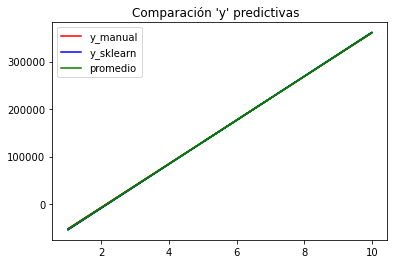

,x,y_manual,y_sklean,promedio
0,7.0,222961.218074,223138.281778,223049.749926
1,6.0,177014.772608,176868.510804,176941.641706
2,7.0,222961.218074,223138.281778,223049.749926
3,7.0,222961.218074,223138.281778,223049.749926
4,8.0,268907.663541,269408.052751,269157.858146
...,...,...,...,...
1148,6.0,177014.772608,176868.510804,176941.641706
1149,6.0,177014.772608,176868.510804,176941.641706
1150,7.0,222961.218074,223138.281778,223049.749926
1151,5.0,131068.327141,130598.739831,130833.533486


In [23]:
y_manual_o,y_sklean_o,y_promedio_o =predicciones(modelo_over[len(modelo_over.keys())-1],modelo_OverQual_sklearn,OverallQual[0])
comparacion_over = grafica_comparacion(y_manual_o,y_sklean_o,y_promedio_o,dt['OverallQual'])
comparacion_over

#### 1stFlrSF con el último modelo generado vs modelos sklean testings

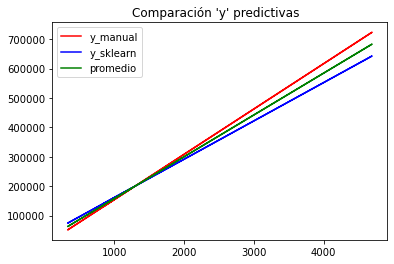

,x,y_manual,y_sklean,promedio
0,856.0,131978.065506,142533.816881,137255.941194
1,1262.0,194575.009452,195466.706069,195020.857760
2,920.0,141845.564059,150877.917639,146361.740849
3,961.0,148166.930320,156223.357188,152195.143754
4,1145.0,176535.988660,180212.646869,178374.317765
...,...,...,...,...
1148,953.0,146933.493001,155180.344593,151056.918797
1149,2073.0,319614.717680,301202.107870,310408.412775
1150,1188.0,183165.714250,185818.839566,184492.276908
1151,1078.0,166205.951112,171477.416387,168841.683750


In [24]:
y_manual_flr,y_sklean_flr,y_promedio_flr =predicciones(modelo_flr[len(modelo_flr.keys())-1],modelo_1stFlrSF_sklearn,O1stFlrSF[0])
comparacion_flr = grafica_comparacion(y_manual_flr,y_sklean_flr,y_promedio_flr,dt['1stFlrSF'])
comparacion_flr

#### calculando modelo con el datset de test de 20% con sklearn

In [25]:
lm3 = LinearRegression()
lm4 = LinearRegression()
OverallQual_test = np.array([dtTestin['OverallQual'].tolist()])
O1stFlrSF_test    = np.array([dtTestin['1stFlrSF'].tolist()])
SalePrice_test    = np.array(dtTestin['SalePrice'].tolist())
modelo_OverQual_sklearn_test = lm3.fit(OverallQual_test.reshape(-1,1),SalePrice_test)
modelo_1stFlrSF_sklearn_test = lm4.fit(O1stFlrSF_test.reshape(-1,1),SalePrice_test)

#### OverallQual calculamos 'y' predicción con datos del test del 20%

In [26]:
y_manual_test_o, y_klean_test_o,y_promedio_test_o = predicciones(modelo_over[len(modelo_over.keys())-1], modelo_OverQual_sklearn_test, OverallQual_test[0])
error_sklearn_o = calculo_error(y_klean_test_o, dtTestin['SalePrice'])
error_manual_o  = calculo_error(y_manual_test_o, dtTestin['SalePrice'])

#### 1stFlrSF calculamos 'y' predicción con datos del test del 20%

In [27]:
y_manual_test_flr, y_klean_test_flr,y_promedio_test_flr = predicciones(modelo_flr[len(modelo_flr.keys())-1], modelo_1stFlrSF_sklearn_test, O1stFlrSF_test[0])
error_sklearn_flr = calculo_error(y_klean_test_flr, dtTestin['SalePrice'])
error_manual_flr  = calculo_error(y_manual_test_flr, dtTestin['SalePrice'])

### Gráficamos errores

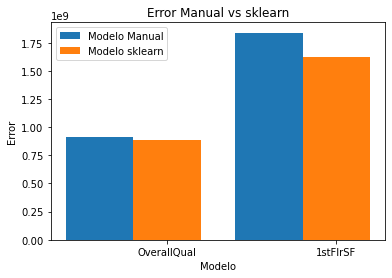

In [28]:
numero_grupo = 2
indice_barras = np.arange(2)
ancho_barras = 0.40

error_manuales = [error_manual_o,error_manual_flr]
error_sklearn = [error_sklearn_o,error_sklearn_flr]

plt.bar(indice_barras,error_manuales,width=ancho_barras,label='Modelo Manual')
plt.bar(indice_barras+ancho_barras,error_sklearn,width=ancho_barras,label='Modelo sklearn')
plt.legend(loc='best')
plt.xticks(indice_barras+ancho_barras,('OverallQual','1stFlrSF'))

plt.ylabel('Error')
plt.xlabel('Modelo')
plt.title('Error Manual vs sklearn')

plt.show()

### Conlusión

En comparación con el modelo realizado de forma manual en donde tomamos dos variables OverallQual y 1stFlrSF las dos con mayor correlación con SalePrice, podemos observar que el mejor modelo es cuando se uso la lavariable OverallQual ya que presenta menor error al de 1stFlrSF.

Si comparamos los modelos manuales de las dos variables con el modelo creado usando la libreria sklearn, podemos observar que el modelo creado por Sklearn presenta errores más bajos en los dos modelos, por lo que podrianos utilizar los modelos creados con la libreria sklearn.

